## Final Project Submission

Please fill out:
* Student name: Lauren Esser
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


from James: Try random forests, gradient boosted trees, consider support vector machines. 



## Introduction

The goal of this notebook is to predict which water pumps in Tanzania are function, which need repairs, and which pumps do not work at all. By gaining a better understanding of factors that impact these water pumps we are able to improve maintence and ensure all pumps stay functional.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import missingno as msno 
from sklearn.model_selection import train_test_split


## Obtain Data

> Data is taken from Taarifa and the Tanzanian Ministry of Water. 

In [2]:
data_labels = pd.read_csv('PumpData/TrainingLabels.csv')
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3]:
data_labels.nunique()

id              59400
status_group        3
dtype: int64

In [4]:
data_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


**data_labels is broken down into two groups id and status_group.** 

*Purpose*
- id column: unique identifier of each water pump
- status_group: states if the water pump is functioning or not. 

*Numbers*
- id column: 59400 unique values.
- status_group: 3 unique values. These values include: 
    - 32259 functional pumps
    - 22824 non-functional pumps
    - 4317 pumps that are functional but in need of repair.
    
*Data Types*
- id: int64
- status_group: object

In [6]:
data_values = pd.read_csv('PumpData/TrainingValues.csv')
pd.set_option('display.max_columns', None)
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [7]:
data_values.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

**Summary of each column**
> Information taken from drivendata.org. Click [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list) for access

- amount_tsh: Total static head (amount water available to waterpoint)
- date_recorded: The date the row was entered
- funder: Who funded the well
- gps_height: Altitude of the well
- installer: Organization that installed the well
- longitude: GPS coordinate
- latitude: GPS coordinate
- wpt_name: Name of the waterpoint if there is one
- num_private: *no information*
- basin: Geographic water basin
- subvillage: Geographic location
- region: Geographic location
- region_code: Geographic location (coded)
- district_code: Geographic location (coded)
- lga: Geographic location
- ward: Geographic location
- population: Population around the well
- public_meeting: True/False
- recorded_by: Group entering this row of data
- scheme_management: Who operates the waterpoint
- scheme_name: Who operates the waterpoint
- permit: If the waterpoint is permitted
- construction_year: Year the waterpoint was constructed
- extraction_type: The kind of extraction the waterpoint uses
- extraction_type_group: The kind of extraction the waterpoint uses
- extraction_type_class: The kind of extraction the waterpoint uses
- management: How the waterpoint is managed
- management_group: How the waterpoint is managed
- payment: What the water costs
- payment_type: What the water costs
- water_quality: The quality of the water
- quality_group: The quality of the water
- quantity: The quantity of water
- quantity_group: The quantity of water
- source: The source of the water
- source_type: The source of the water
- source_class: The source of the water
- waterpoint_type: The kind of waterpoint
- waterpoint_type_group: The kind of waterpoint

>Columns that I could see having an impact on pump functionality: gps_height, installer, geographic water basin, region, population, scheme_management, scheme_name, permimt, construction_year, extraction_type, water_quality. 


> *Reading through the descriptions I can see that many columns share the same information. I will consider merging these columns.*

In [8]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

**Values**
- int64 = 7 columns
- float64 = 3 columns
- object = 30 columns

## Scrub

### Check for Nulls

In [9]:
data_labels.isna().sum()

id              0
status_group    0
dtype: int64

> No missing information in our labels dataframe. 

In [10]:
data_values.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

>Need to take care of null values in funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit.

<AxesSubplot:>

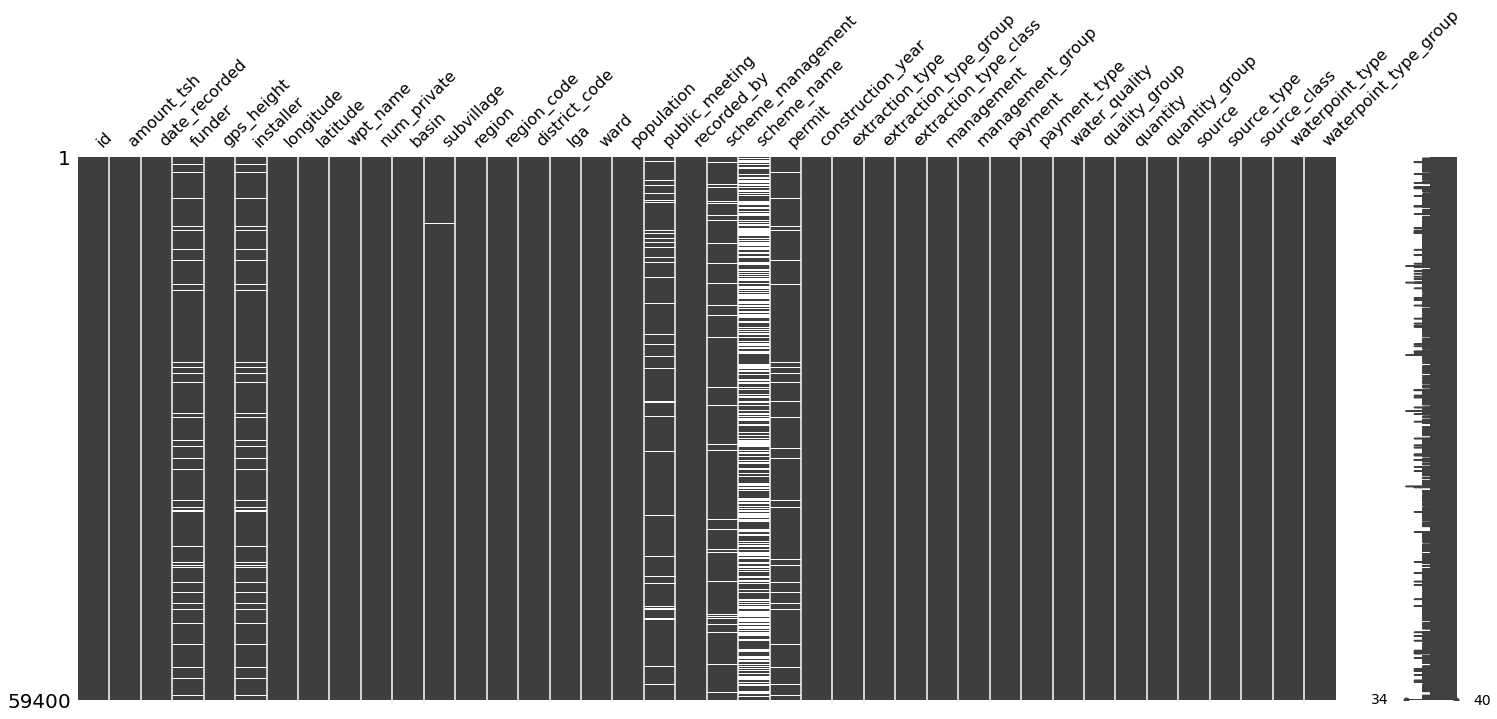

In [11]:
msno.matrix(data_values) 

> Looking at the matrix we can see that funder and installer have identical missing data in their rows. I will take care of these below.

### Data Value, Column Funder Nulls

In [12]:
data_values.funder.value_counts().head(50)

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In [13]:
data_values.funder.isna().sum()

3635

3635 Null Values 

...as well as...


- Not Known (27)
- Unknown (4)
- Missio (2) Is that a place? - Missions Group so leave it.
- None (2)
- 0 did 777 pumps, I am going to assume this means zero as in they do not know who inserted the pumps.

In [14]:
data_values.funder.fillna('Unknown', inplace = True)

In [15]:
data_values.funder.isna().sum()

0

In [16]:
data_values.funder.replace(to_replace= ['Not Known', 'None', '0', 'NaN'], value= 'Unknown',
                           inplace = True)

In [17]:
data_values.funder.value_counts().head(50)

Government Of Tanzania            9084
Unknown                           4445
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

### Data Values, Column Installer Nulls

In [18]:
pd.set_option('display.max_rows', None)
data_values.installer.value_counts()

DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
KKKT                                898
Hesawa                              840
0                                   777
TCRS                                707
Central government                  622
CES                                 610
Community                           553
DANID                               552
District Council                    551
HESAWA                              539
LGA                                 408
World vision                        408
WEDECO                              397
TASAF                               396
District council                    392
Gover                               383
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287


In [19]:
data_values.installer.isna().sum()

3655

3655 Null Value which is slightly higher than the funder column.

...as well as...

- 0 = 777
- Not known = 24
- not known = 17

In [20]:
data_values.installer.fillna('Unknown', inplace = True)

In [21]:
data_values.installer.replace(to_replace= ['not known', 'Not known', 'None', '0', 'NaN'], 
                              value= 'Unknown', inplace = True)

In [22]:
data_values.installer.isna().sum()

0

### Dropping Unneeded Columns

<AxesSubplot:>

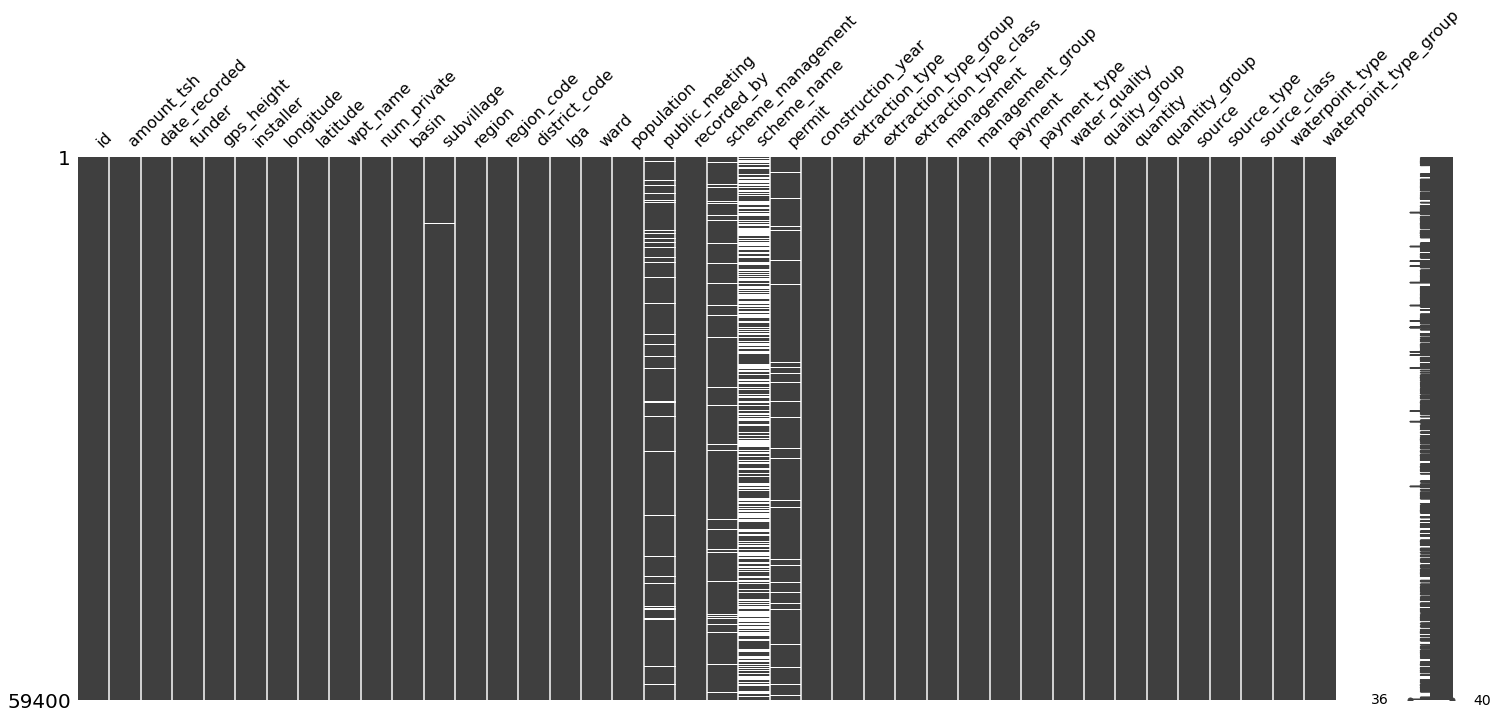

In [23]:
msno.matrix(data_values) 

#### Dropping Scheme Name

In [24]:
data_values.scheme_name.isna().value_counts()

False    31234
True     28166
Name: scheme_name, dtype: int64

In [25]:
data_values.scheme_management.isna().sum()

3877

>Scheme Management and Scheme Name are both described as "Who operates the waterpoint". Since there Scheme Name has over 28,000 Null values I will drop that column and keep Scheme Management in its place.

In [26]:
data_values = data_values.drop('scheme_name', axis = 1)

In [27]:
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


#### Dropping Waterpoint_type

>Waterpoint_type and Waterpoint_type_group have the same information. Looking at their value counts below I can see that it is identical except that waterpoint_type_group has more information on communal standpipe. Therefore I will drop waterpoint_type from the data frame. 

In [28]:
data_values.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [29]:
data_values.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [30]:
data_values = data_values.drop('waterpoint_type', axis = 1)

#### Dropping Source_type and Source_class

In [32]:
data_values.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [33]:
data_values.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [34]:
data_values.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

>These three columns have a lot in column. Upon first glance I can see that source_class is the least useful of the three because it only specifies groundwater vs surface water. The other two columns specify the type of ground water or surface water making them more detailed and useful. Therefore I will definitely drop source_class.

>Looking at source vs source_type these two are very similar. source splits river and lake into two categories as well as adding hand dtw. Upon researching I can see that a borehole is basically a smaller well that is dug by a machine dbh. I will keep source and drop souce_type since it is less detailed.

In [35]:
data_values = data_values.drop(columns = ['source_class', 'source_type'], axis = 1)

In [37]:
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,hand pump


#### Drop quantity_group

In [38]:
data_values.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [39]:
data_values.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These two columns have the exact same information. I will drop quantity_group as I do not need repeated information.

In [40]:
data_values = data_values.drop('quantity_group', axis = 1)

#### Dropping quality_group

In [41]:
data_values.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [42]:
data_values.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Upon doing research abandoned can mean one of two things: 
1. Well was abandoned and is no longer in use - if so the well needs to be plugged or restored to its original hydrogelogical condition in order to prevent pollution and possible complications from mixing with other aquifiers.
2. Well is no longer being taken care of - this would mean it can be unsafe for the population to drink from

**I will drop quality_group since the term abandoned carries important information**

In [43]:
data_values = data_values.drop('quality_group', axis = 1)

#### Dropping Payment 

In [45]:
data_values.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [46]:
data_values.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

>These two columns have the exact same information. I will drop payment in order to keep only one column.

In [47]:
data_values = data_values.drop('payment', axis = 1)

#### Management

In [48]:
data_values.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [49]:
data_values.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

>For now I am going to keep both of these groups. Management_group states if the well is taken care of by commerce, the people actually using the well, or a political group. This may be interesting to look at later. Then the management column takes the groups and divides them into smaller groups. I could see later that a specific user-group is not taking care of the wells and we could target that subgroup more.

#### Dropping Extraction_type_group and extraction_type_class

In [50]:
data_values.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [51]:
data_values.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [52]:
data_values.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

>These three columns all answer the question "what kind of extraction the waterpoint uses" to varying degrees. I am going to keep the column extraction_type because it is the most specific.

In [55]:
data_values = data_values.drop(columns = ['extraction_type_class',
                                          'extraction_type_group'], axis = 1)

#### Construction year

In [61]:
data_values.construction_year.value_counts().sort_index()

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

Looking at construction year there are 20,709 rows that do not have their construction year identified. I am going to assume that these pumps were built before those with valid data and assign 0 to 1959.

In [56]:
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,management,management_group,payment_type,water_quality,quantity,source,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,vwc,user-group,annually,soft,enough,spring,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,vwc,user-group,per bucket,soft,enough,dam,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,vwc,user-group,per bucket,salty,enough,other,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,vwc,user-group,never pay,soft,enough,machine dbh,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,wug,user-group,unknown,milky,enough,shallow well,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,vwc,user-group,never pay,salty,seasonal,machine dbh,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,vwc,user-group,never pay,soft,enough,shallow well,hand pump


## Explore

## Model

##  Interpret

**NOTES**

User friendly data sets: kaggle or UCI macine learning repro